In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
file_path = '/content/drive/MyDrive/psd/Saham/Tencent.xlsx'
data = pd.read_excel(file_path)

In [77]:
print("Nama Kolom dalam Dataset:")
print(data.columns)

Nama Kolom dalam Dataset:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [78]:
# Preprocessing
data = pd.DataFrame({  # Contoh data (sesuaikan dengan dataset asli Anda)
    'Date': pd.date_range(start='2023-01-01', periods=50, freq='D'),
    'Open': np.random.randint(400, 420, 50),
    'High': np.random.randint(420, 440, 50),
    'Low': np.random.randint(390, 400, 50),
    'Close': np.random.randint(405, 415, 50),
    'Volume': np.random.randint(100000, 200000, 50)
})

# Isi nilai NaN dengan 0 (jika ada)
data.fillna(0, inplace=True)

# Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Urutkan berdasarkan tanggal
data.sort_values('Date', inplace=True)

# Reset index setelah sorting
data.reset_index(drop=True, inplace=True)

# Menampilkan ringkasan data
print(data.head())


        Date  Open  High  Low  Close  Volume
0 2023-01-01   416   424  392    408  171449
1 2023-01-02   413   422  392    406  182257
2 2023-01-03   405   421  395    406  107525
3 2023-01-04   414   422  398    408  170694
4 2023-01-05   400   438  396    409  164567


In [79]:
# Parameter
features = ['Close', 'Open', 'High', 'Low']  # Fitur input (multivariate)
target_column = 'Volume'  # Target prediksi
window_size = 5  # Jendela waktu
forecast_steps = 3  # Jumlah langkah prediksi ke depan

# Fungsi sliding window untuk dataset multivariate
def create_multistep_multivariate_data(data, features, target_column, window_size, forecast_steps):
    X, y = [], []
    for i in range(len(data) - window_size - forecast_steps + 1):
        # Fitur: Ambil data dalam jendela waktu (sliding window)
        window_X = data[features].iloc[i:i + window_size].values.flatten()  # Flatten untuk menyatukan fitur
        target_y = data[target_column].iloc[i + window_size:i + window_size + forecast_steps].values

        X.append(window_X)
        y.append(target_y)

        # Cetak window untuk melihat sliding window
        print(f"Window {i + 1}:")
        print("X:", window_X)
        print("y:", target_y)
        print("-" * 30)

    return np.array(X), np.array(y)

# Membuat dataset sliding window
X, y = create_multistep_multivariate_data(data, features, target_column, window_size, forecast_steps)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Window 1:
X: [408 416 424 392 406 413 422 392 406 405 421 395 408 414 422 398 409 400
 438 396]
y: [138989 105528 198264]
------------------------------
Window 2:
X: [406 413 422 392 406 405 421 395 408 414 422 398 409 400 438 396 408 407
 432 394]
y: [105528 198264 198620]
------------------------------
Window 3:
X: [406 405 421 395 408 414 422 398 409 400 438 396 408 407 432 394 408 408
 430 399]
y: [198264 198620 151924]
------------------------------
Window 4:
X: [408 414 422 398 409 400 438 396 408 407 432 394 408 408 430 399 408 413
 431 390]
y: [198620 151924 100458]
------------------------------
Window 5:
X: [409 400 438 396 408 407 432 394 408 408 430 399 408 413 431 390 413 415
 434 398]
y: [151924 100458 149250]
------------------------------
Window 6:
X: [408 407 432 394 408 408 430 399 408 413 431 390 413 415 434 398 414 406
 431 399]
y: [100458 149250 153437]
------------------------------
Window 7:
X: [408 408 430 399 408 413 431 390 413 415 434 398 414 406 431 399 405 

In [80]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Menampilkan dimensi data setelah split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (34, 20)
Shape of X_test: (9, 20)
Shape of y_train: (34, 3)
Shape of y_test: (9, 3)


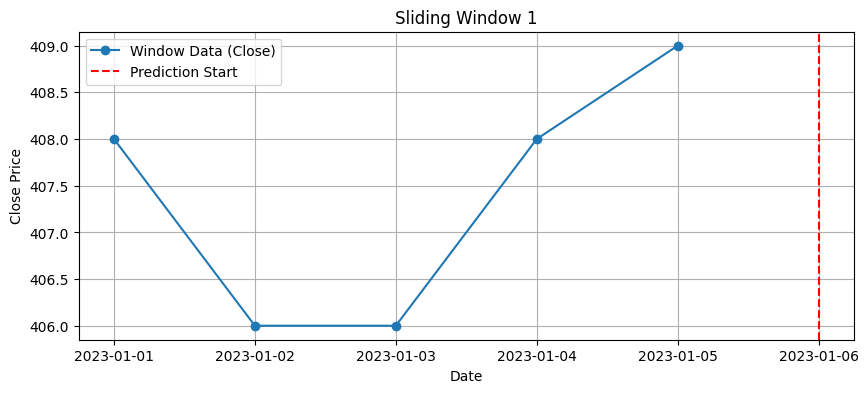

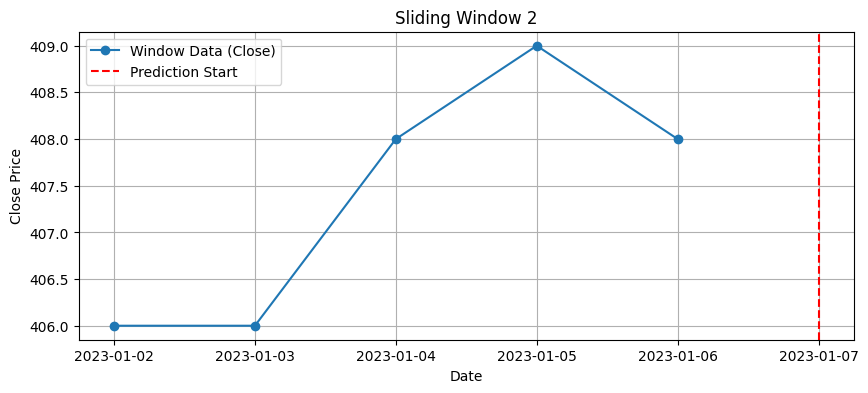

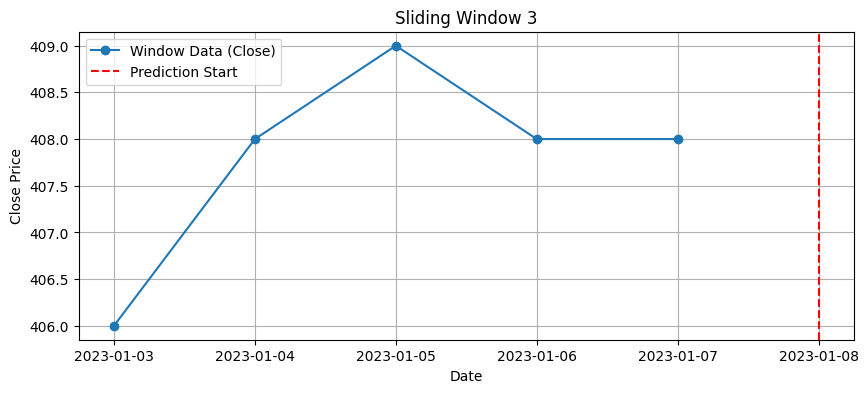

In [81]:
# Visualisasi Sliding Window
for i in range(3):  # Contoh 3 iterasi pertama
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'].iloc[i:i + window_size],
             data['Close'].iloc[i:i + window_size], marker='o', label='Window Data (Close)')
    plt.axvline(data['Date'].iloc[i + window_size], color='r', linestyle='--', label='Prediction Start')
    plt.legend()
    plt.title(f"Sliding Window {i + 1}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid()
    plt.show()


In [82]:
# Model Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Prediksi
y_pred = tree_model.predict(X_test)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Contoh prediksi untuk beberapa langkah ke depan
print("Actual:", y_test[:3])  # Beberapa target aktual
print("Predicted:", y_pred[:3])  # Prediksi


RMSE: 31787.80962360676
Actual: [[146708 123340 169458]
 [123340 169458 137797]
 [169458 137797 123020]]
Predicted: [[106065. 107443. 109868.]
 [148370. 129651. 154864.]
 [108144. 106065. 107443.]]


In [83]:
# Menghitung MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

# Menghitung MAPE (Mean Absolute Percentage Error) dalam persen
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")


MAE: 28388.88888888889
MAPE: 20.040736843881334 %


In [84]:
import joblib

# Save the model to a file
joblib.dump(tree_model, 'tencent_multi.pkl')


['tencent_multi.pkl']

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [58]:
file_path = '/content/drive/MyDrive/psd/Saham/Tencent.xlsx'
data = pd.read_excel(file_path)

In [59]:
# Preprocessing
data = pd.DataFrame({  # Contoh data (sesuaikan dengan dataset asli Anda)
    'Date': pd.date_range(start='2023-01-01', periods=50, freq='D'),
    'Open': np.random.randint(400, 420, 50),
    'High': np.random.randint(420, 440, 50),
    'Low': np.random.randint(390, 400, 50),
    'Close': np.random.randint(405, 415, 50),
    'Volume': np.random.randint(100000, 200000, 50)
})

# Isi nilai NaN dengan 0 (jika ada)
data.fillna(0, inplace=True)

# Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Urutkan berdasarkan tanggal
data.sort_values('Date', inplace=True)

# Reset index setelah sorting
data.reset_index(drop=True, inplace=True)

# Menampilkan ringkasan data
print(data.head())


        Date  Open  High  Low  Close  Volume
0 2023-01-01   412   434  393    406  120092
1 2023-01-02   403   433  392    411  134428
2 2023-01-03   406   439  392    407  103710
3 2023-01-04   405   432  392    410  165599
4 2023-01-05   400   435  392    406  168633


In [60]:
# Parameter
features = ['Close', 'Open', 'High', 'Low']  # Fitur input (multivariate)
target_column = 'Volume'  # Target prediksi
window_size = 5  # Jendela waktu
forecast_steps = 3  # Jumlah langkah prediksi ke depan

# Fungsi sliding window untuk dataset multivariate
def create_multistep_multivariate_data(data, features, target_column, window_size, forecast_steps):
    X, y = [], []
    for i in range(len(data) - window_size - forecast_steps + 1):
        # Fitur: Ambil data dalam jendela waktu (sliding window)
        window_X = data[features].iloc[i:i + window_size].values.flatten()  # Flatten untuk menyatukan fitur
        target_y = data[target_column].iloc[i + window_size:i + window_size + forecast_steps].values

        X.append(window_X)
        y.append(target_y)

        # Cetak window untuk melihat sliding window
        print(f"Window {i + 1}:")
        print("X:", window_X)
        print("y:", target_y)
        print("-" * 30)

    return np.array(X), np.array(y)

# Membuat dataset sliding window
X, y = create_multistep_multivariate_data(data, features, target_column, window_size, forecast_steps)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Window 1:
X: [406 412 434 393 411 403 433 392 407 406 439 392 410 405 432 392 406 400
 435 392]
y: [177351 108797 125090]
------------------------------
Window 2:
X: [411 403 433 392 407 406 439 392 410 405 432 392 406 400 435 392 412 404
 431 397]
y: [108797 125090 189612]
------------------------------
Window 3:
X: [407 406 439 392 410 405 432 392 406 400 435 392 412 404 431 397 409 413
 434 396]
y: [125090 189612 157033]
------------------------------
Window 4:
X: [410 405 432 392 406 400 435 392 412 404 431 397 409 413 434 396 412 401
 438 392]
y: [189612 157033 196057]
------------------------------
Window 5:
X: [406 400 435 392 412 404 431 397 409 413 434 396 412 401 438 392 408 401
 424 395]
y: [157033 196057 141379]
------------------------------
Window 6:
X: [412 404 431 397 409 413 434 396 412 401 438 392 408 401 424 395 406 407
 434 395]
y: [196057 141379 195780]
------------------------------
Window 7:
X: [409 413 434 396 412 401 438 392 408 401 424 395 406 407 434 395 408 

In [61]:
# Menggunakan StandardScaler untuk scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (34, 20)
Shape of X_test: (9, 20)


In [62]:
# Parameter untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Mencari hyperparameter terbaik dengan GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Menggunakan model terbaik yang ditemukan
best_rf_model = grid_search.best_estimator_


Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [63]:
# Melatih model dengan parameter terbaik
best_rf_model.fit(X_train, y_train)

# Prediksi
y_pred = best_rf_model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


MAE: 27197.871216528813
MAPE: 22.591525150538473%


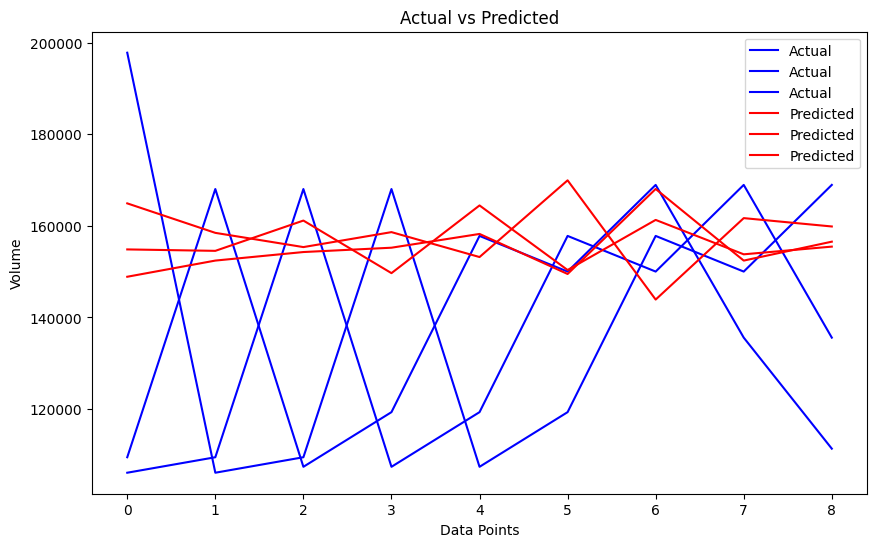

In [64]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Data Points")
plt.ylabel("Volume")
plt.show()


In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [66]:
file_path = '/content/drive/MyDrive/psd/Saham/Tencent.xlsx'
data = pd.read_excel(file_path)

In [67]:
# Preprocessing
data = pd.DataFrame({  # Contoh data (sesuaikan dengan dataset asli Anda)
    'Date': pd.date_range(start='2023-01-01', periods=50, freq='D'),
    'Open': np.random.randint(400, 420, 50),
    'High': np.random.randint(420, 440, 50),
    'Low': np.random.randint(390, 400, 50),
    'Close': np.random.randint(405, 415, 50),
    'Volume': np.random.randint(100000, 200000, 50)
})

# Isi nilai NaN dengan 0 (jika ada)
data.fillna(0, inplace=True)

# Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Urutkan berdasarkan tanggal
data.sort_values('Date', inplace=True)

# Reset index setelah sorting
data.reset_index(drop=True, inplace=True)

# Menampilkan ringkasan data
print(data.head())


        Date  Open  High  Low  Close  Volume
0 2023-01-01   400   435  395    409  185391
1 2023-01-02   417   428  399    409  103546
2 2023-01-03   409   439  398    411  105315
3 2023-01-04   404   436  390    410  197094
4 2023-01-05   414   431  391    409  107876


In [68]:
# Menggunakan MinMaxScaler untuk normalisasi data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume']])

# Fungsi untuk membuat dataset dengan sliding windows
def create_lstm_data(data, target_column, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])  # Ambil window_size data terakhir
        y.append(data[i + window_size, 0])  # Ambil nilai target (Open) untuk prediksi
    return np.array(X), np.array(y)

# Menentukan window_size dan target_column
window_size = 5
X, y = create_lstm_data(data_scaled, target_column='Open', window_size=window_size)

# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Mengubah bentuk X untuk LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (36, 5, 4)
Shape of X_test: (9, 5, 4)


In [69]:
# Membangun model LSTM
model = Sequential()

# Menambahkan lapisan LSTM
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer

# Menyusun model dengan optimizer Adam dan loss function MSE
model.compile(optimizer='adam', loss='mean_squared_error')

# Menampilkan summary model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50)                  │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Melatih model LSTM
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - loss: 0.2930 - val_loss: 0.3870
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2348 - val_loss: 0.3188
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1853 - val_loss: 0.2597
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1477 - val_loss: 0.2088
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1166 - val_loss: 0.1661
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0953 - val_loss: 0.1327
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0825 - val_loss: 0.1095
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0798 - val_loss: 0.0974
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0831 - val_loss: 0.0938
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0880 - val_loss: 0.0933
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0947 - val_loss: 0.0933
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0855 - val_loss: 0.094

In [71]:
# Prediksi dengan model LSTM
y_pred = model.predict(X_test)

# Evaluasi menggunakan MAE dan MAPE
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
MAE: 0.27802568761228763
MAPE: 121.65764368861912%


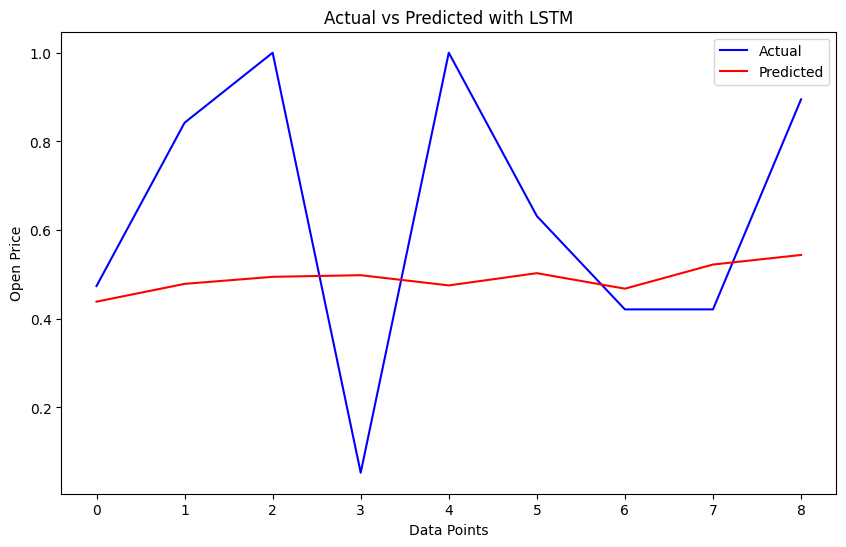

In [72]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.legend()
plt.title("Actual vs Predicted with LSTM")
plt.xlabel("Data Points")
plt.ylabel("Open Price")
plt.show()
